# Predicting NBA All-Star Chance Based on Player Performance

By: Bill Makwae, Ayush Vora, Ray Nguyen, QingRu Kong

## Introduction

Every year in February, NBA fans rejoice as they get to see their favorite players selected for the all-star game. Players are selected by media and fan votes, meaning that popularity is the nominating factor. However, players are more likely to be popular based on their individual game-to-game performance. Thus, this analysis hopes to answer the question: Can an NBA player’s selection to the all star game be predicted by their annual performance?

In order to answer this question, we will be using two sets of data, one from ["NBA Player Stats” on nba.com](https://www.nba.com/stats/players/traditional/?sort=PTS&dir=-1&Season=2015-16&SeasonType=Regular%20Season) and [“NBA All Stars 2000-2016” from kaggle.com](https://www.kaggle.com/fmejia21/nba-all-star-game-20002016?select=NBA+All+Stars+2000-2016+-+Sheet1.csv). NBA Player Stats includes all the NBA player statistics for each season from 2010-2016 and the All Star dataset includes the all star statistics from 2000-2016. Using these datasets we aim to make a classification model that will predict whether a player will be an all star for each season based on their annual performances.

## Preliminary Exploratory Data Analysis

In [14]:
## RUN THIS FIRST TO LOAD LIBRARIES

library(tidyverse)
library(repr)
library(readxl)
library(dplyr)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [15]:
## Data set #1: NBA Player Stats
## Filtered from years 2011-2015

players <- read.csv("https://raw.githubusercontent.com/RayNguyent/DSCI-100-project/urls/data/nba_player_stats.csv")
head(players)


,Year,Player,GP,MIN,PTS,FGM,FGA,FG.,X3PM,X3PA,⋯,FTM,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV
,<int>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2011,Kevin Durant,78,38.9,27.7,9.1,19.7,46.2,1.9,5.3,⋯,7.6,8.7,88.0,0.7,6.1,6.8,2.7,1.1,1.0,2.8
2,2011,LeBron James,79,38.8,26.7,9.6,18.8,51.0,1.2,3.5,⋯,6.4,8.4,75.9,1.0,6.5,7.5,7.0,1.6,0.6,3.6
3,2011,Carmelo Anthony,77,35.7,25.6,8.9,19.5,45.5,1.2,3.3,⋯,6.6,7.9,83.8,1.5,5.8,7.3,2.9,0.9,0.6,2.7
4,2011,Dwyane Wade,76,37.1,25.5,9.1,18.2,50.0,0.8,2.7,⋯,6.5,8.6,75.8,1.6,4.8,6.4,4.6,1.5,1.1,3.1
5,2011,Kobe Bryant,82,33.9,25.3,9.0,20.0,45.1,1.4,4.3,⋯,5.9,7.1,82.8,1.0,4.1,5.1,4.7,1.2,0.1,3.0
6,2011,Amar'e Stoudemire,78,36.8,25.3,9.5,19.0,50.2,0.1,0.3,⋯,6.1,7.7,79.2,2.5,5.6,8.2,2.6,0.9,1.9,3.2


In [16]:
## Data set #2: NBA All Stars 2000-2016
## Filtered from years 2011-2015

all_stars <- read_csv("https://raw.githubusercontent.com/RayNguyent/DSCI-100-project/develop/data/all_stars_2000_2016.csv")
all_stars_filtered <- all_stars %>% 
    filter(Year <= 2015 & Year >= 2011) %>% 
    select(Year, Player) %>% 
    mutate(Is_All_Star = "All Star")
head(all_stars_filtered)

Parsed with column specification:
cols(
  Year = col_double(),
  Player = col_character(),
  Pos = col_character(),
  HT = col_character(),
  WT = col_double(),
  Team = col_character(),
  `Selection Type` = col_character(),
  `NBA Draft Status` = col_character(),
  Nationality = col_character()
)



Year,Player,Is_All_Star
<dbl>,<chr>,<chr>
2015,LeBron James,All Star
2015,Dwyane Wade,All Star
2015,Paul George,All Star
2015,Carmelo Anthony,All Star
2015,Kyle Lowry,All Star
2015,Jimmy Butler,All Star


In [17]:

## Combined data sets

combined_data <- left_join(players, all_stars_filtered, by = c("Year", "Player")) %>% 
    replace(is.na(.), "Regular") %>% 
    mutate(Is_All_Star = as_factor(Is_All_Star))

head(combined_data)

,Year,Player,GP,MIN,PTS,FGM,FGA,FG.,X3PM,X3PA,⋯,FTA,FT.,OREB,DREB,REB,AST,STL,BLK,TOV,Is_All_Star
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2011,Kevin Durant,78,38.9,27.7,9.1,19.7,46.2,1.9,5.3,⋯,8.7,88.0,0.7,6.1,6.8,2.7,1.1,1.0,2.8,All Star
2,2011,LeBron James,79,38.8,26.7,9.6,18.8,51.0,1.2,3.5,⋯,8.4,75.9,1.0,6.5,7.5,7.0,1.6,0.6,3.6,All Star
3,2011,Carmelo Anthony,77,35.7,25.6,8.9,19.5,45.5,1.2,3.3,⋯,7.9,83.8,1.5,5.8,7.3,2.9,0.9,0.6,2.7,All Star
4,2011,Dwyane Wade,76,37.1,25.5,9.1,18.2,50.0,0.8,2.7,⋯,8.6,75.8,1.6,4.8,6.4,4.6,1.5,1.1,3.1,All Star
5,2011,Kobe Bryant,82,33.9,25.3,9.0,20.0,45.1,1.4,4.3,⋯,7.1,82.8,1.0,4.1,5.1,4.7,1.2,0.1,3.0,All Star
6,2011,Amar'e Stoudemire,78,36.8,25.3,9.5,19.0,50.2,0.1,0.3,⋯,7.7,79.2,2.5,5.6,8.2,2.6,0.9,1.9,3.2,Regular


In [25]:
## Select the potential attributes
selected_combined_data <- combined_data %>% 
    filter(Year <= 2015 & Year >= 2011) %>% 
    filter(Player != "0") %>%
    select(Year, Player, MIN, PTS, FG., REB, AST,Is_All_Star)
head(selected_combined_data)

,Year,Player,MIN,PTS,FG.,REB,AST,Is_All_Star
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2011,Kevin Durant,38.9,27.7,46.2,6.8,2.7,All Star
2,2011,LeBron James,38.8,26.7,51.0,7.5,7.0,All Star
3,2011,Carmelo Anthony,35.7,25.6,45.5,7.3,2.9,All Star
4,2011,Dwyane Wade,37.1,25.5,50.0,6.4,4.6,All Star
5,2011,Kobe Bryant,33.9,25.3,45.1,5.1,4.7,All Star
6,2011,Amar'e Stoudemire,36.8,25.3,50.2,8.2,2.6,Regular


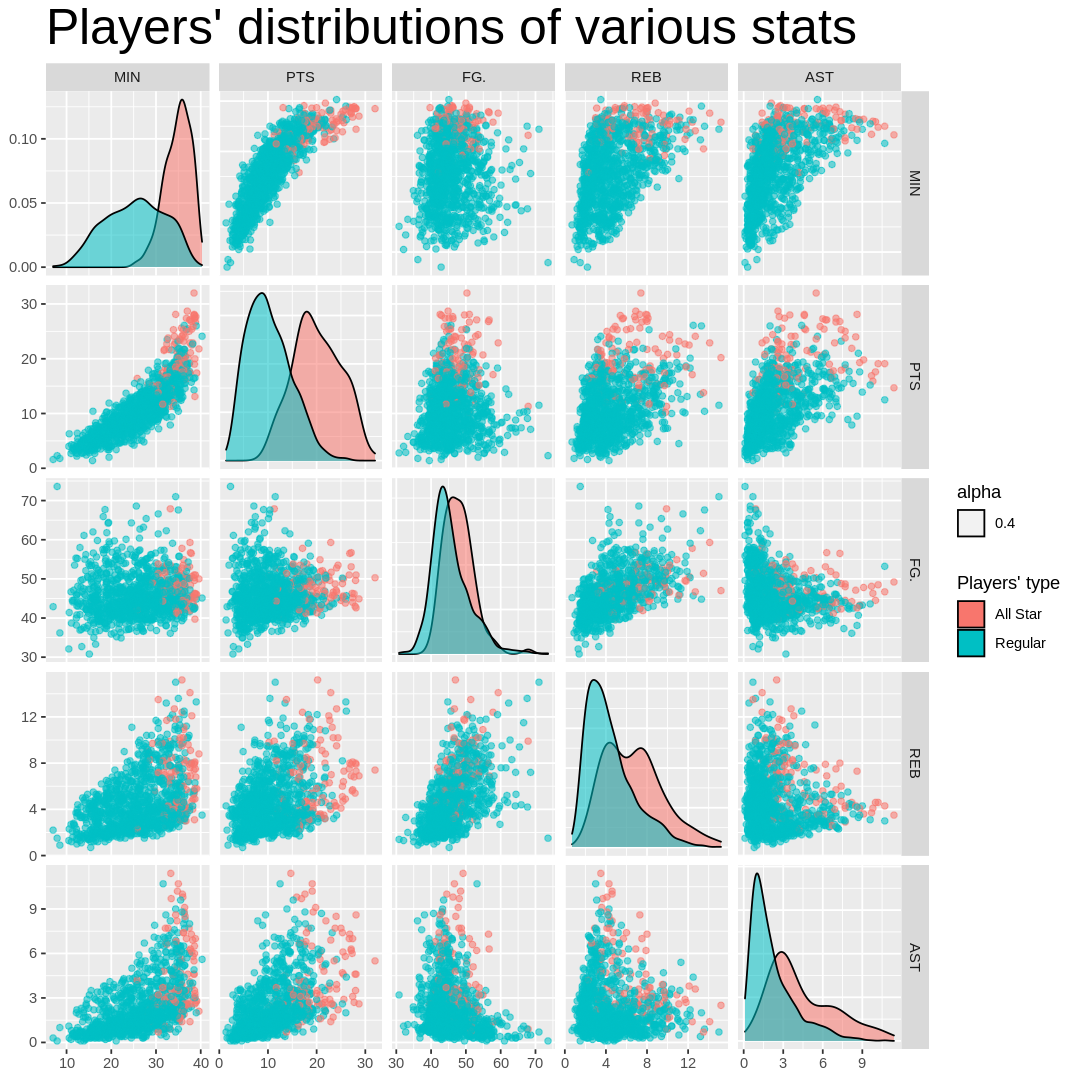

In [66]:
## Graphs displaying relationships between each variable.
options(repr.plot.width = 9, repr.plot.height = 9) 
plot <- ggpairs(selected_combined_data, columns = 3:7, legend = 1,
                ggplot2::aes(color = Is_All_Star, alpha = 0.4),
                upper = list(continuous = "points", wrap("cor", size = 2.5))) +
                labs(title = "Players' distributions of various stats", fill = "Players' type") +
                theme(plot.title = element_text(size = 30))
                
plot

## Methods

We will find each player’s annual player stats (points, rebounds, assists, minutes per game, and field goal percentage) for each year and use these predictors in our classification model. We chose these variables because they are the most indicative of a player's offensive output, which is the main focus of the all star game.

## Expected Outcomes and Significance

Since likely cast their votes based on the player's offensive performance, we expect all star players to have higher player stats (points, rebounds, assists, etc) which will make our classification model relatively accurate.

The impact of this information could improve people's sports betting methods, and help organisations determine player value when negotiating contracts. Many organisations give contracts with bonuses to all star players and this information could help them determine the amount of extra money to offer a player if they make the game. 

Further analysis of these stats could help answer questions like: What makes a good defensive player of the year canidate? What kind of players would be invited to join the Team USA Olympic Basketball team? Can a player's value to an organisation be assessed through their player stats? Can player stat information infer how large their contract should be?
